Этот датасет содержит аудиальную статистику 2000 лучших треков на Spotify с 2000 по 2019 год. Датасет содержит около 18 столбцов, каждый из которых описывает трек и его качества.

1. artist: Название исполнителя.
2. song: Название песни.
3. duration_ms: Продолжительность песни в миллисекундах.
4. explicit: Указывает, содержит ли песня ненормативную лексику.
5. year: Год выпуска песни.
6. popularity: Популярность песни.
7. danceability: Оценка танцевальности песни.
8. energy: Оценка энергии песни.
9. key: Ключ песни.
10. loudness: Громкость песни.
11. mode: Модальность песни.
12. speechiness: Указывает на количество разговорной речи в песне.
13. acousticness: Указывает на акустическую составляющую песни.
14. instrumentalness: Указывает на наличие инструментальной музыки в песне.
15. liveness: Оценка живого выступления в песне.
16. valence: Оценка валентности песни.
17. tempo: Темп песни в ударах в минуту.
18. genre: Жанр песни.

С помощью этого датасета я буду предугадывать danceability исходя из остальных признаков













In [115]:
import pandas as pd

df = pd.read_csv('songs_normalize.csv')

df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [117]:
# проверяем на нулевые значения
df.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [118]:
df.duplicated().value_counts()

,count
False,1941
True,59


In [119]:
df.drop_duplicates(inplace=True)

df.shape

(1941, 18)

# Обработка данных

Здесь мне нужно удалить столбцы artist и song, а также заменить значения explicit на 0 и 1. После этого приводим все данные к типу float

In [126]:
import pandas as pd

df_cleaned = df.drop(columns=['artist', 'song', 'genre'])

df_cleaned['explicit'] = df_cleaned['explicit'].replace({'True': 1, 'False': 0})

df_cleaned = df_cleaned.astype(float)

df_cleaned

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160.0,0.0,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066.0,0.0,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546.0,0.0,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493.0,0.0,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560.0,0.0,2000.0,65.0,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026.0,0.0,2019.0,79.0,0.842,0.734,1.0,-5.065,0.0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426.0,0.0,2019.0,78.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593.0,0.0,2019.0,69.0,0.847,0.678,9.0,-8.635,1.0,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029.0,0.0,2019.0,75.0,0.741,0.520,8.0,-7.513,1.0,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [174]:
# @title
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

# Статистическое описание столбцов

In [170]:
df_cleaned.describe()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,0.276662,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,0.447463,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,0.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,0.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,0.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,1.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,1.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


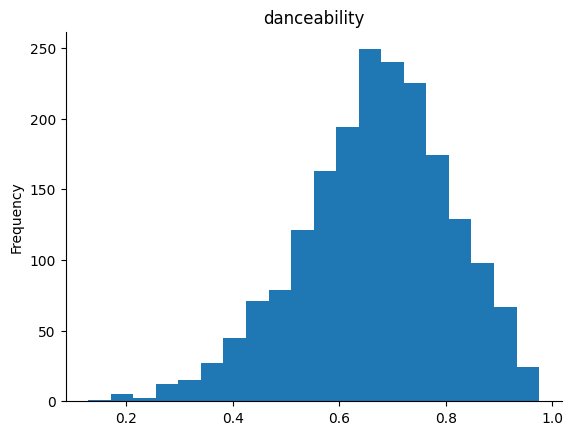

In [171]:
# @title
from matplotlib import pyplot as plt
df_cleaned['danceability'].plot(kind='hist', bins=20, title='danceability')
plt.gca().spines[['top', 'right',]].set_visible(False)

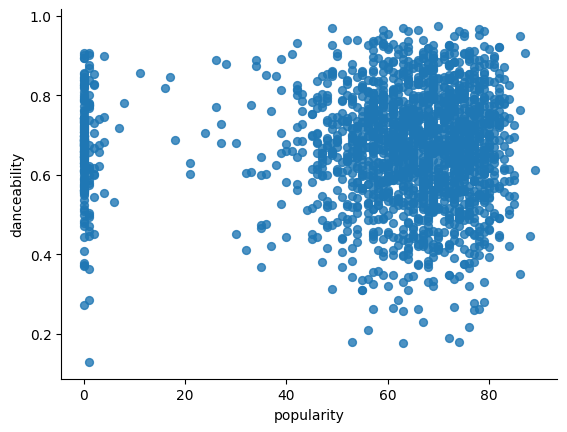

In [169]:
# @title  {"display-mode":"form"}

from matplotlib import pyplot as plt
df_cleaned.plot(kind='scatter', x='popularity', y='danceability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Квантиль:

In [155]:
df_cleaned['popularity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])


,popularity
0.005,0.0
0.010,0.0
0.050,0.0
0.100,32.0
0.500,65.0
0.900,78.0
0.950,80.0
0.990,84.0
0.995,85.0


# Вычисляем значения среднего значения и разброс для признаков

In [139]:
mean_values = df_cleaned.mean()
print("Средние значения:\n", mean_values)

variance_values = df_cleaned.var()
print("\nРазброс (дисперсия):\n", variance_values)

Средние значения:
 duration_ms         228594.973725
explicit                 0.276662
year                  2009.520350
popularity              59.633179
danceability             0.667814
energy                   0.721549
key                      5.369397
loudness                -5.514082
mode                     0.553323
speechiness              0.103783
acousticness             0.128173
instrumentalness         0.015372
liveness                 0.181726
valence                  0.552966
tempo                  120.158442
dtype: float64

Разброс (дисперсия):
 duration_ms         1.540546e+09
explicit            2.002231e-01
year                3.452188e+01
popularity          4.622953e+02
danceability        1.977069e-02
energy              2.336973e-02
key                 1.307018e+01
loudness            3.759529e+00
mode                2.472841e-01
speechiness         9.244407e-03
acousticness        2.978518e-02
instrumentalness    7.809499e-03
liveness            1.985550e-02
vale

# Нормализуем данные

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_normalized

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727
1937,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122
1938,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704
1939,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946


# Корреляционная матрица:

In [142]:
import plotly.express as px



fig=px.imshow(df_normalized.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>Попарная корелляция столбцов')
fig.update_layout(title_x=0.5)
fig.show()

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = df_normalized.drop(columns=['danceability'])
y = df_normalized['danceability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

knn = KNeighborsRegressor(n_neighbors=4)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.02327917150738527
R^2 Score: 0.18276187257524457


# Вывод:


*   **Mean Squared Error**: Среднеквадратичная ошибка равна 0.023279, что показывает среднее квадратичное отклонение предсказанных значений от фактических. Чем меньше значение MSE, тем точнее модель.
*   **R² Score**: Коэффициент детерминации составляет 0.1828, что указывает на невысокую точность модели. Значение R² показывает, что только 18.3% вариаций целевой переменной объясняются моделью. Обычно модель с таким R² score можно считать недостаточно точной.

Исходя из этого, можно сказать, что модель имеет довольно низкую точность

